/tmp/ipykernel_2298971/3817534040.py:10: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


total events in csv file: 200000
total events selected: 268


[Text(-1000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(5000.0, 0, ''),
 Text(6000.0, 0, ''),
 Text(7000.0, 0, '')]

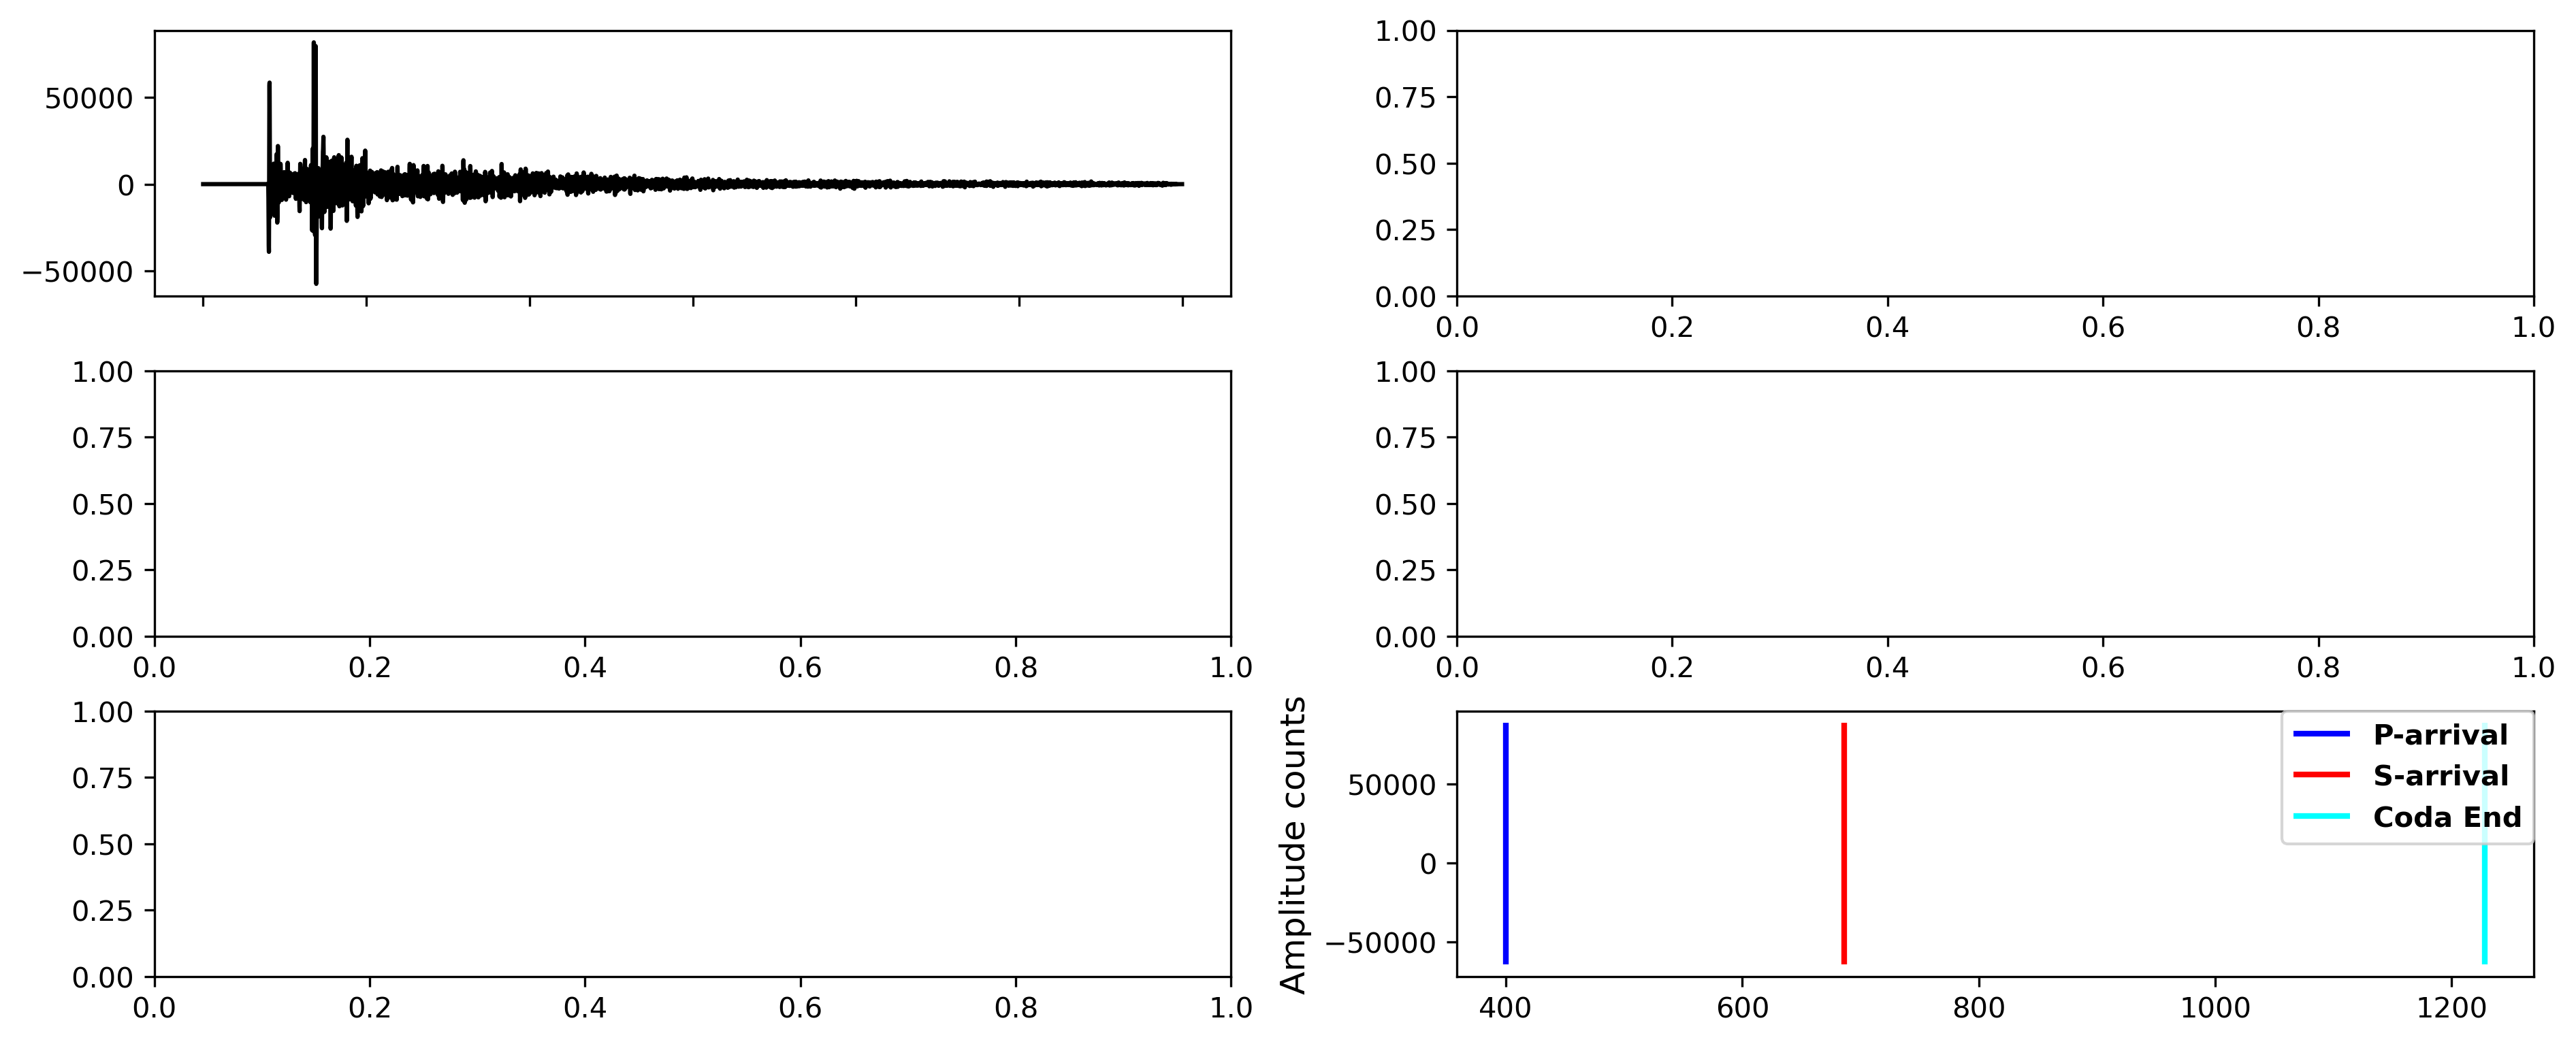

In [4]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_name = "/data/jyzheng/datasets/stead/chunk2.hdf5"
csv_file = "/data/jyzheng/datasets/stead/chunk2.csv"

# reading the csv file into a dataframe:
df = pd.read_csv(csv_file)
print(f'total events in csv file: {len(df)}')
# filterering the dataframe
df = df[(df.trace_category == 'earthquake_local') & (df.source_distance_km <= 20) & (df.source_magnitude > 3)]
print(f'total events selected: {len(df)}')

# making a list of trace names for the selected data
ev_list = df['trace_name'].to_list()

# retrieving selected waveforms from the hdf5 file:
dtfl = h5py.File(file_name, 'r')
c = 0
evi = ev_list[0]
dataset = dtfl.get('data/'+str(evi))
# waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel
data = np.array(dataset)

# fig = plt.figure()
figsize = np.array([25, 10]) * 0.5
dpi = 300
fig, axs = plt.subplots(3, 2, figsize=figsize, dpi=dpi, constrained_layout=True)
ax = axs[0,0]
ax.plot(data[:,0], 'k')
# legend_properties = {'weight':'bold'}
# plt.tight_layout()
ymin, ymax = ax.get_ylim()
pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)
plt.ylabel('Amplitude counts', fontsize=12)
ax.set_xticklabels([])

# ax = axs[1,0]
# plt.plot(data[:,1], 'k')
# plt.rcParams["figure.figsize"] = (8, 5)
# legend_properties = {'weight':'bold'}
# plt.tight_layout()
# ymin, ymax = ax.get_ylim()
# pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
# sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
# cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
# plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)
# plt.ylabel('Amplitude counts', fontsize=12)
# ax.set_xticklabels([])

# ax = axs[2,0]
# plt.plot(data[:,2], 'k')
# plt.rcParams["figure.figsize"] = (8,5)
# legend_properties = {'weight':'bold'}
# plt.tight_layout()
# ymin, ymax = ax.get_ylim()
# pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
# sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
# cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
# plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)
# plt.ylabel('Amplitude counts', fontsize=12)
# ax.set_xticklabels([])
# # plt.show()



# #STFT
# from scipy.signal import stft


# def z_norm(x):
#     """z-score 归一化"""
#     for i in range(3):
#         x_std = x[:, i].std() + 1e-3
#         x[:, i] = (x[:, i] - x[:, i].mean()) / x_std
#     return x

# def cal_norm_spectrogram(x,  sample_rate=100, window_length=20, nfft=100):
#     spec = np.zeros([3, int(x.shape[0] / window_length * 2), int(nfft / 2)])
#     for i in range(3):
#         _, _, spectrogram = stft(x[:, i],
#                                  fs=sample_rate,
#                                  window='hann',
#                                  nperseg=window_length,
#                                  noverlap=int(window_length / 2),
#                                  nfft=nfft,
#                                  boundary='zeros')
#         spectrogram = spectrogram[1:, 1:]
#         # spectrogram = (spectrogram - spectrogram.mean())/spectrogram.std()+1e-3
#         spec[i, :] = np.abs(spectrogram).transpose(1, 0)
#     return spec


# stft_data = z_norm(data)
# stft_data = cal_norm_spectrogram(stft_data)
# print(stft_data.shape)


# for i in range(stft_data.shape[0]):
#     img_data = stft_data[i, :, :]
#     ax = axs[i,1]
#     plt.imshow(img_data, cmap='jet')
#     ax.set_xticklabels([])
#     plt.show()





In [8]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_name = "/data/jyzheng/datasets/stead/chunk2.hdf5"
csv_file = "/data/jyzheng/datasets/stead/chunk2.csv"

# reading the csv file into a dataframe:
df = pd.read_csv(csv_file)
print(f'total events in csv file: {len(df)}')
# filterering the dataframe
df = df[(df.trace_category == 'earthquake_local') & (df.source_distance_km <= 20) & (df.source_magnitude > 3)]
print(f'total events selected: {len(df)}')

# making a list of trace names for the selected data
ev_list = df['trace_name'].to_list()

# retrieving selected waveforms from the hdf5 file:
dtfl = h5py.File(file_name, 'r')
c = 0


total events in csv file: 200000
total events selected: 268


/tmp/ipykernel_2298971/2056699216.py:10: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [26]:
tidx = np.random.randint(268)
evi = ev_list[tidx]
print(tidx)
dataset = dtfl.get('data/'+str(evi))
# waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel
data = np.array(dataset)

#STFT
from scipy.signal import stft


def z_norm(x):
    """z-score 归一化"""
    for i in range(3):
        x_std = x[:, i].std() + 1e-3
        x[:, i] = (x[:, i] - x[:, i].mean()) / x_std
    return x

def cal_norm_spectrogram(x,  sample_rate=100, window_length=20, nfft=100):
    spec = np.zeros([3, int(x.shape[0] / window_length * 2), int(nfft / 2)])
    for i in range(3):
        _, _, spectrogram = stft(x[:, i],
                                 fs=sample_rate,
                                 window='hann',
                                 nperseg=window_length,
                                 noverlap=int(window_length / 2),
                                 nfft=nfft,
                                 boundary='zeros')
        spectrogram = spectrogram[1:, 1:]
        # spectrogram = (spectrogram - spectrogram.mean())/spectrogram.std()+1e-3
        spec[i, :] = np.abs(spectrogram).transpose(1, 0)
    return spec


stft_data = z_norm(data)
stft_data = cal_norm_spectrogram(stft_data)


107


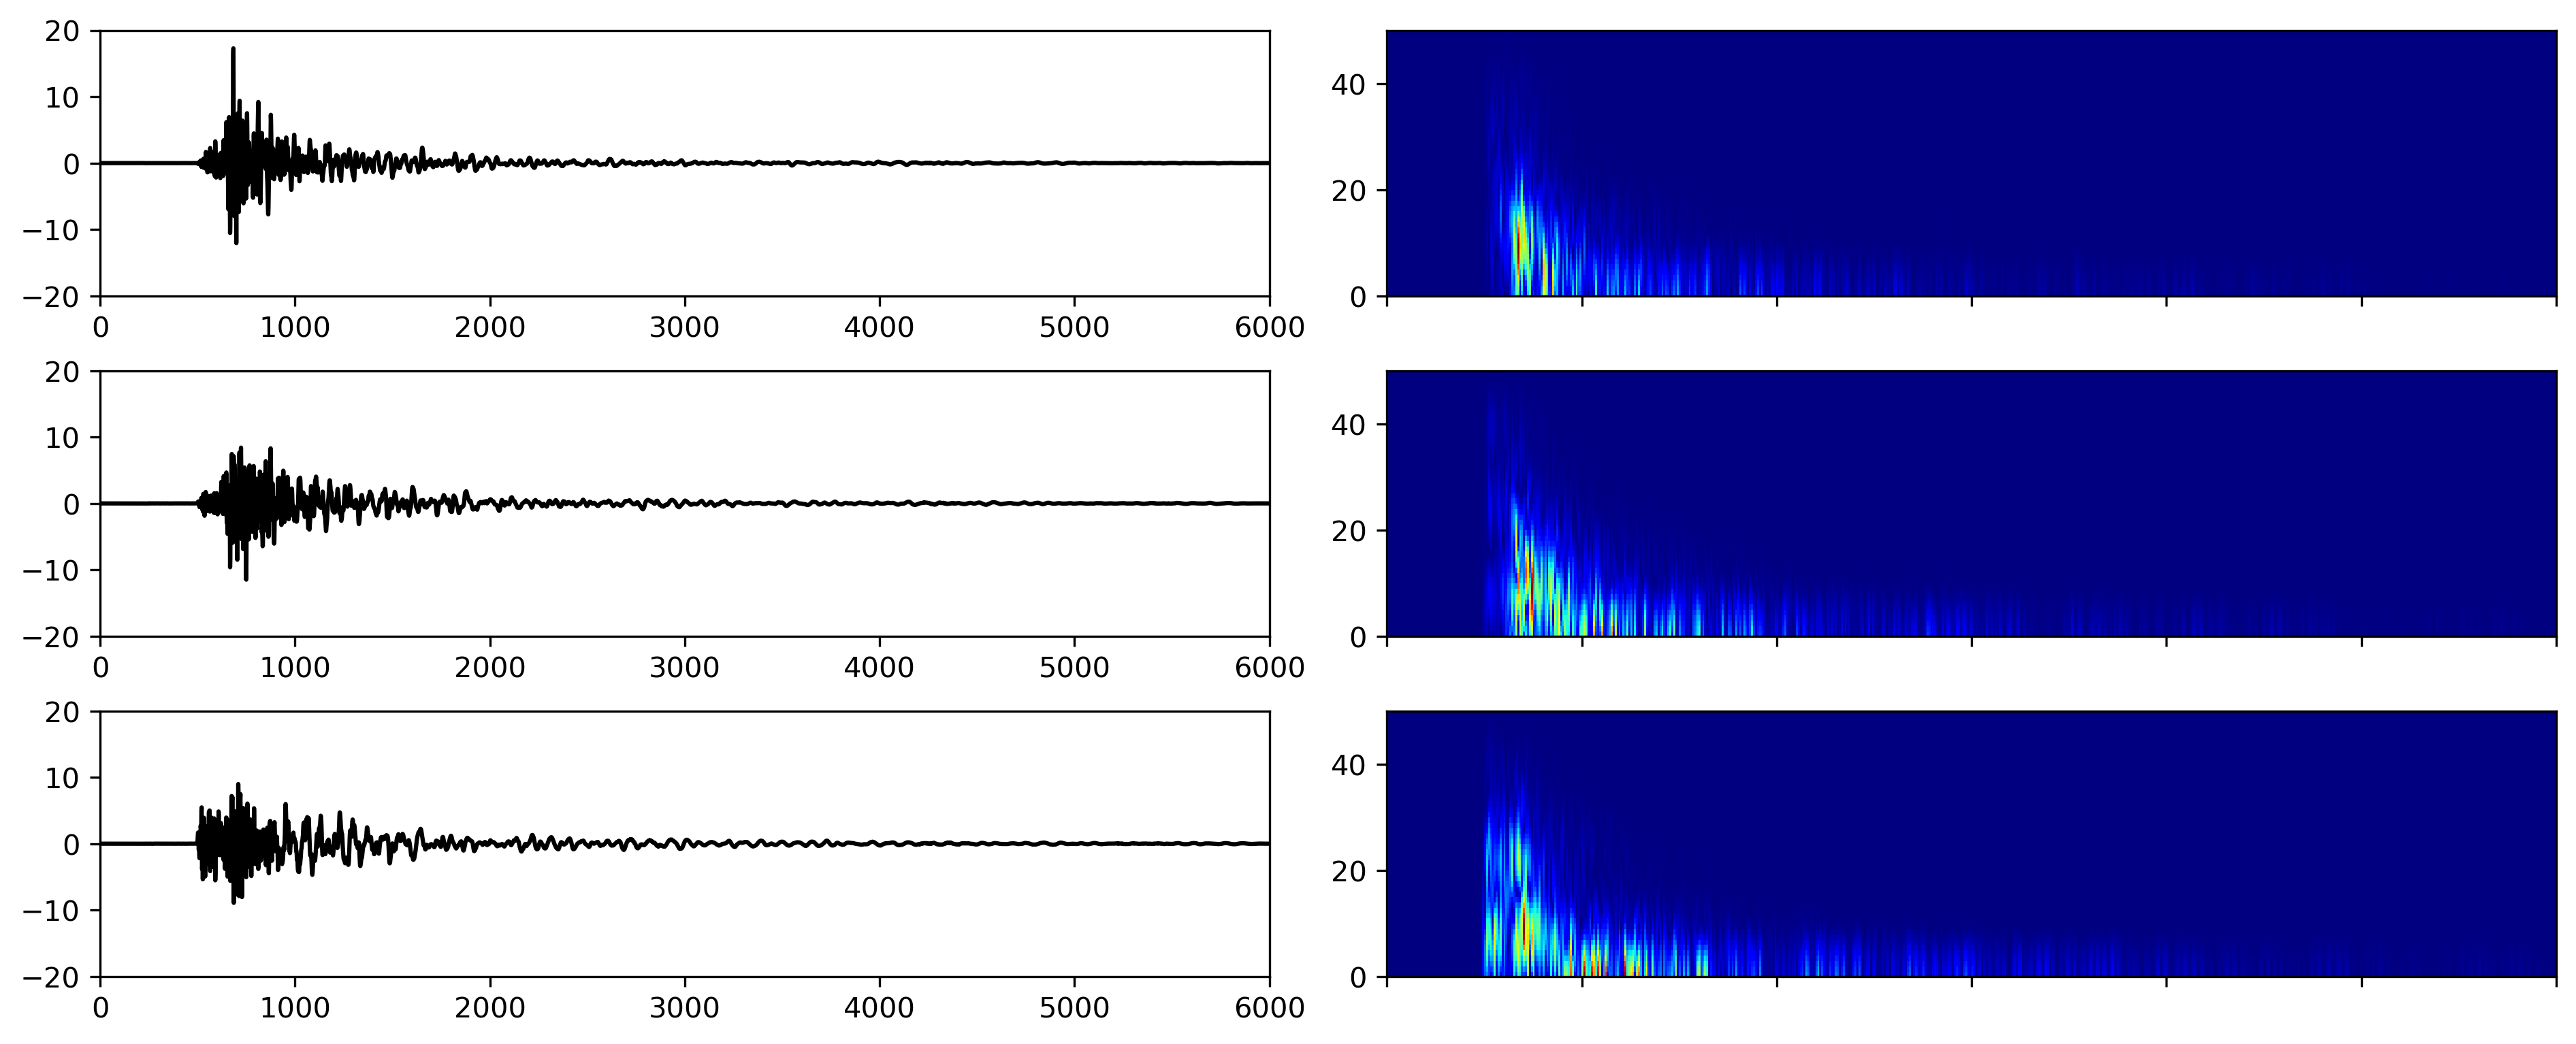

In [30]:

# fig = plt.figure()
figsize = np.array([25, 10]) * 0.5
dpi = 300
fig, axs = plt.subplots(3, 2, figsize=figsize, dpi=dpi, constrained_layout=True)

for tdata, ax in zip(data.T, axs[:, 0]): 
    ax.plot(tdata, 'k')
    ax.set_ylim(-20, 20)
    ax.set_xlim(0, 6000)
    

for img_data, ax in zip(stft_data, axs[:, 1]):
    ax.pcolor(img_data.T, cmap='jet')
    ax.set_xticklabels([])
plt.savefig('stft_%d.png' % tidx)
